In [3]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [4]:
#loading data
df = pd.read_csv('netflix_titles.csv')
df.iloc[5453:5458,:] #reading a random sample from the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5453,s5454,Movie,Sebastian Maniscalco: Stay Hungry,Rik Reinholdtsen,Sebastian Maniscalco,United States,"January 15, 2019",2019,TV-MA,65 min,Stand-Up Comedy,Sebastian Maniscalco brings an acerbically uni...
5454,s5455,Movie,Sebastian Maniscalco: What's Wrong with People?,Manny Rodriguez,Sebastian Maniscalco,United States,"September 17, 2019",2012,TV-MA,76 min,Stand-Up Comedy,With his uproarious tirade on modern behavior ...
5455,s5456,Movie,Sebastian Maniscalco: Why Would You Do That,Joe DeMaio,Sebastian Maniscalco,United States,"August 6, 2019",2016,TV-MA,63 min,Stand-Up Comedy,Sebastian Maniscalco delivers an expressive st...
5456,s5457,TV Show,Second 20s,NaN,"Choi Ji-woo, Lee Sang-yun, Choi Won-young, Kim...",South Korea,"October 16, 2019",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","Facing major changes, a mother realizes it's t..."
5457,s5458,Movie,Secret,Jay Chou,"Jay Chou, Lun-Mei Kwai, Anthony Wong Chau-Sang...","Hong Kong, Taiwan","July 1, 2018",2007,TV-PG,101 min,"Dramas, International Movies, Music & Musicals",Enchanted by a pretty pianist and the haunting...


In [5]:
#creating a separate df for only movies
df_movies = (df[df['type'] == 'Movie']).reset_index()

In [7]:
# a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#statistical summary of the dataframe
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [10]:
#checking number of unique entries/observations
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Data Cleaning

In [11]:
#checking for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#filling nan values for different columns
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['date_added']=df['date_added'].fillna('not specified')

#dropping rows with missing columns 
df.dropna(subset=['country', 'rating'], axis=0, inplace= True)

In [13]:
#checking to see if all nan values have been replaced
df.isnull().sum() 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Exploratory Data Analysis

In [14]:
#creating a new dataframe called rating_count
rating_count=pd.DataFrame(df['rating'].value_counts()).reset_index(inplace=False) 
rating_count.columns=['rating','count']
rating_count

,rating,count
0,TV-MA,2704
1,TV-14,1795
2,TV-PG,741
3,R,663
4,PG-13,383
5,PG,244
6,TV-Y7,221
7,TV-Y,210
8,TV-G,177
9,NR,84


Text(0.5, 1.0, 'Content Ratings on Netflix')

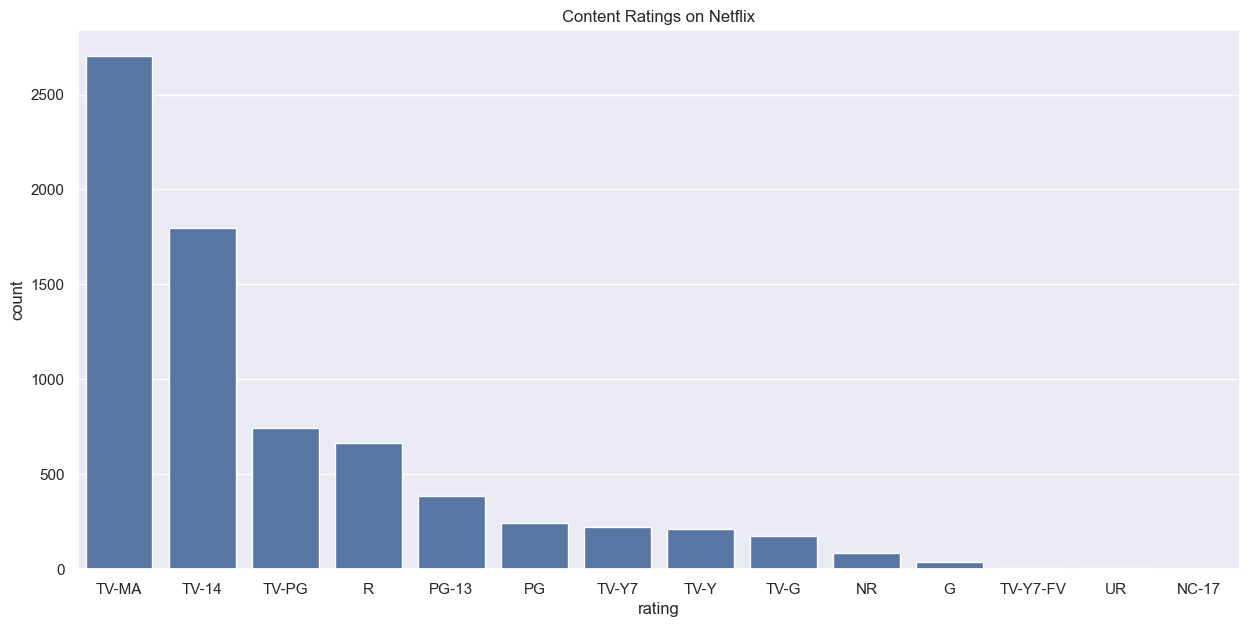

In [15]:
#visualizing the ratings on the netflix dataset
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=rating_count,x='rating',y='count')
ax.set_title("Content Ratings on Netflix")
#plt.savefig('Content Ratings.png')

Text(0, 0.5, 'count')

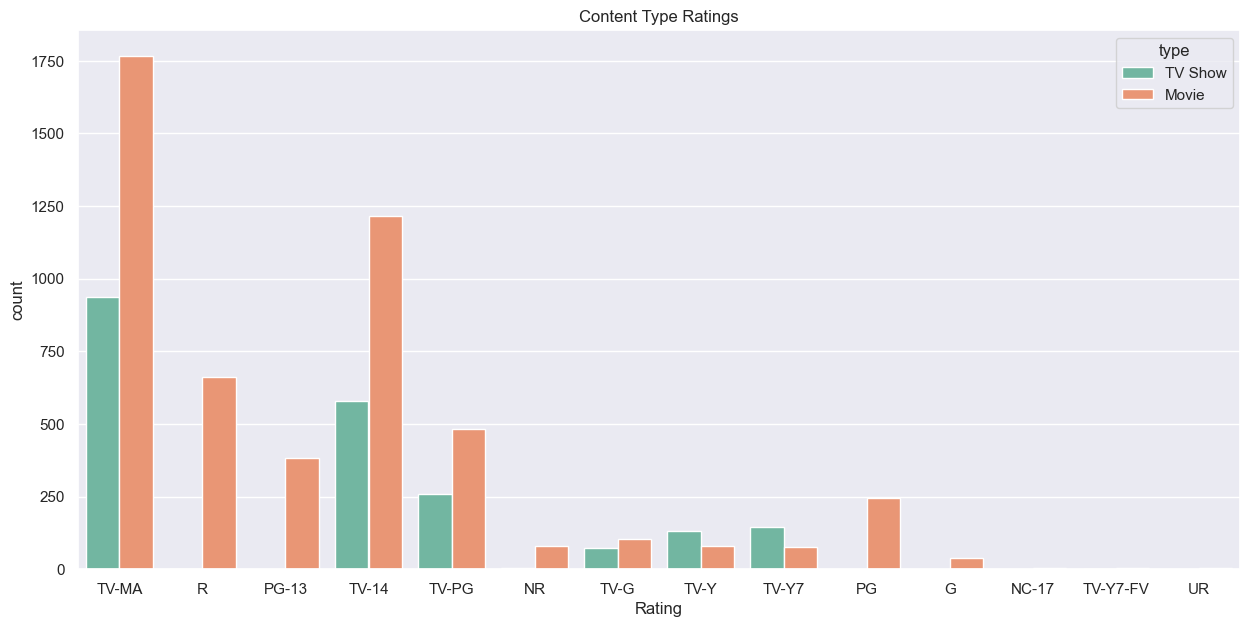

In [20]:
#Checking the content types in each rating 
sns.set_style(style = 'whitegrid')
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(data = df, x= 'rating',hue = 'type', palette='Set2')
ax.set_title('Content Type Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('count')

From the data it shows that a larger percentage of movies and TV shows on netflix are rated TV-MA (i.e. contain  graphic sexual contents,graphic violence and foul languages.

In [17]:
#creating a new dataframe and splitting the country column to contain one country for each movie/Tv show
countries =df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries.sample(50)

title
The Founder                                             Greece
Radium Girls                                     United States
Wild Child                                      United Kingdom
Misfit 2                                           Netherlands
Special Correspondents                          United Kingdom
An Easy Girl                                            France
Z4                                                      Brazil
Special Correspondents                           United States
Woodshock                                        United States
Oscar's Oasis                                           France
Sab Jholmaal Hai                                         India
My Suicide                                       United States
Tango Feroz                                          Argentina
Hisss                                            United States
David Brent: Life on the Road                    United States
NOVA: Chinese Chariot Revealed                   

/var/folders/vw/vb52kqgs533dsg2r0t5b5pp00000gn/T/ipykernel_62131/3090850886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


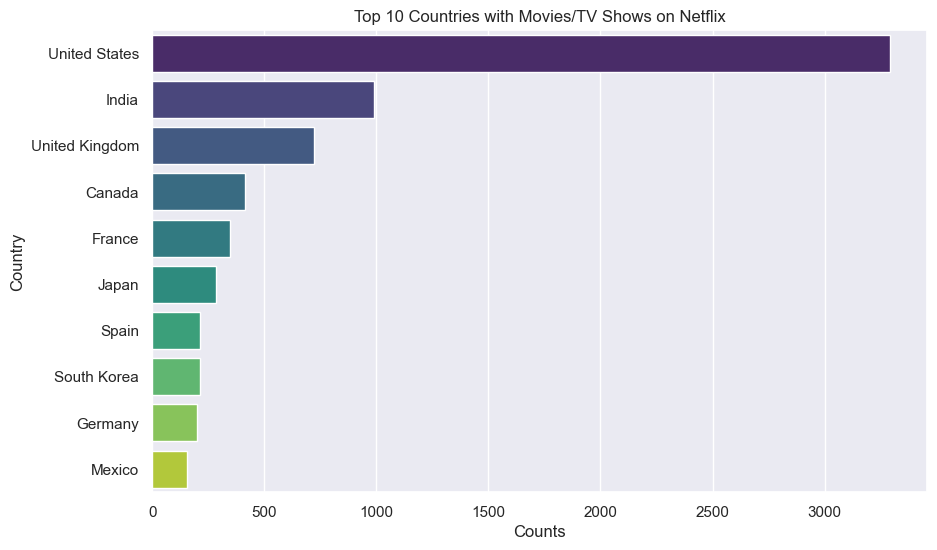

In [23]:
# Assuming `countries` is a Series or DataFrame column containing country names
top_countries = countries.value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
ax.set_title('Top 10 Countries with Movies/TV Shows on Netflix')
ax.set_xlabel('Counts')
ax.set_ylabel('Country')
plt.show()


The above visualisation shows the top ten countries whose productions are featured on Netflix with the United States having the highest number of productions being featured

In [24]:
#Categories of content mostly shown on Netflix
category=df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
category

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zubaan                                           Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 16053, dtype: object

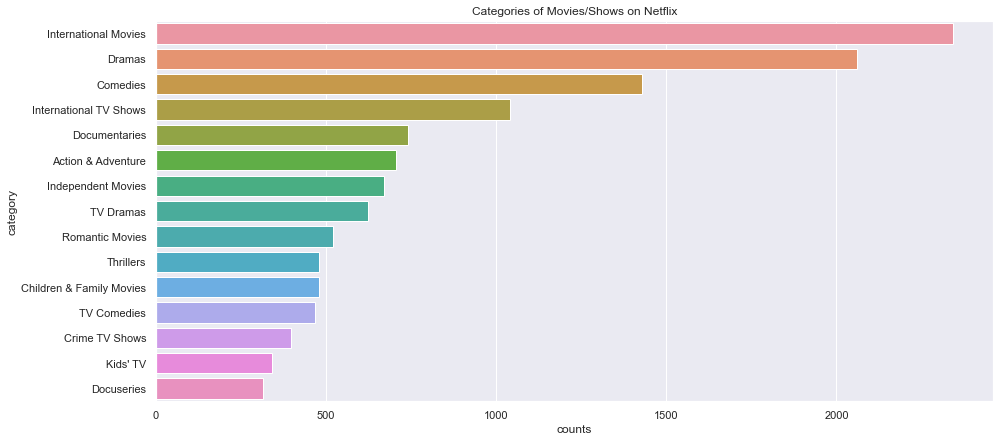

In [19]:
#visualizing categories of movies mostly shown on Netflix
ax=sns.countplot(y=category,order=category.value_counts().index[:15])
ax.set_title('Categories of Movies/Shows on Netflix')
ax.set_xlabel('counts')
ax.set_ylabel('category')


International movies are mostly shown on netflix.This is followed by Dramas and Comedies.The reason is because there are currently more Netflix subscribers internationally than within USA.

As the rules of supply and demand go, it implies that there ought to be a greater proportion of films that satisfy international audiences.

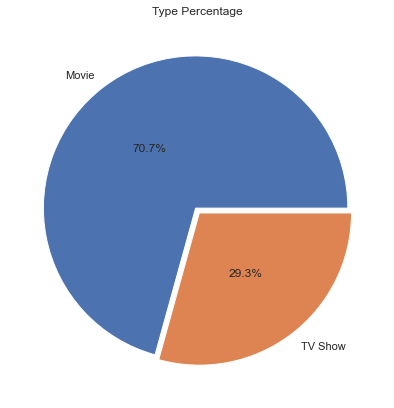

In [20]:
#giving the percentage value of contents shown on Netflix
Content_type = df['type'].value_counts(normalize=True)*100
Content_type

#visualising using a pie chart
labels = Content_type.keys() # get labels from perc
plt.pie(x=Content_type, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Type Percentage")

70.7% of Netflix content are movies while 29.3% are TV shows

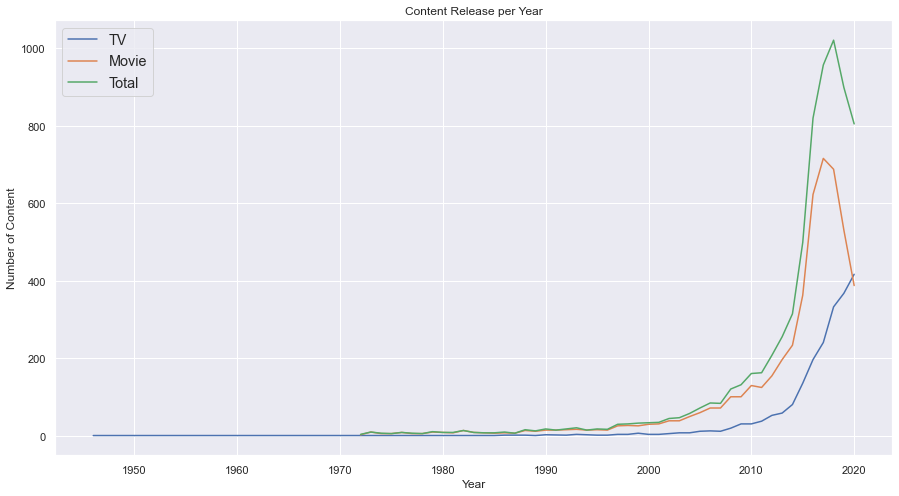

In [21]:
df_1= df[df['type'] == 'TV Show'].groupby('release_year').count()[-50:-1]
df_2 =df[df['type'] == 'Movie'].groupby('release_year').count()[-50:-1]
df_3 =df.groupby('release_year').count()[-50:-1]


plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
sns.lineplot(data = df_1['show_id'],palette = 'Set2')
sns.lineplot(data = df_2['show_id'],palette = 'Set2')
sns.lineplot(data = df_3['show_id'],palette = 'Set2')
plt.title('Content Release per Year')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.legend(['TV', 'Movie','Total'], fontsize='large');

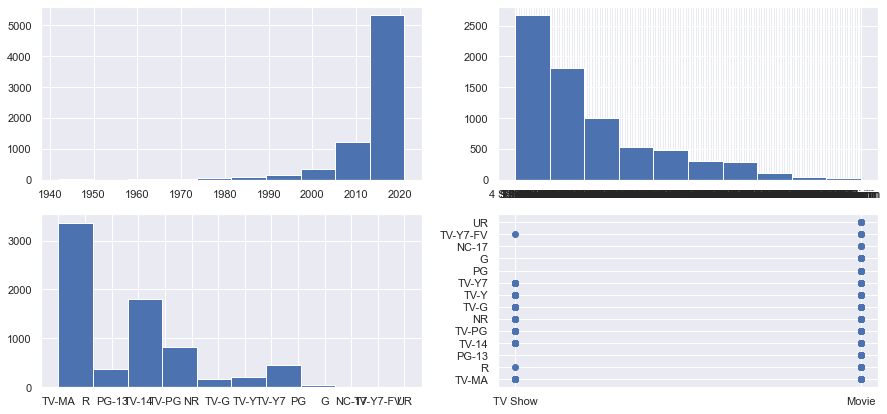

In [22]:
fig, axes =plt.subplots(2,2)
axes[0,0].hist(df['release_year'])
axes[0,1].hist(df['duration'])
axes[1,0].hist(df['rating'])
axes[1,1].scatter(df['type'],df['rating']);

In [28]:
# creating the tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

In [29]:
# filling null values with empty descriptions
df_movies['description'] = df_movies['description'].fillna('')

In [30]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_movies['description'])
tfidf_matrix.shape

(5377, 14601)

In [31]:
# creating the linear kernel for getting the cosine similarity
cosine_similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

In [32]:
movies = pd.Series(df_movies.index,index=df_movies['title'])
movies.shape

(5377,)

In [33]:
def get_movie_recommendations(title, cosine_similarity=cosine_similarity):
    try:
        index=movies[title]
    except KeyError:
        print("Oops, we couldn't find that movie\nCheck out these movies instead")
        return df_movies.sample(n=5)
    similarity_scores=list(enumerate(cosine_similarity[index]))
    similarity_scores=sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    similarity_scores=similarity_scores[1:11]
    movie_indices = [i[0] for i in similarity_scores]
    return df_movies['title'].iloc[movie_indices]

In [34]:
get_movie_recommendations('Indiana Jones and the Kingdom of the Crystal Skull')

2084             Indiana Jones and the Temple of Doom
2083    Indiana Jones and the Raiders of the Lost Ark
2082               Indiana Jones and the Last Crusade
3468                                    Psychokinesis
2842                                 Midnight Special
4205                                          The 2nd
2762       Marvel Super Hero Adventures: Frost Fight!
1272                                      Don Verdean
4150                                        Tamanchey
325                             All The Bright Places
Name: title, dtype: object

In [35]:
def get_a_movie():
    title = input("Enter a movie name\n")
    return get_movie_recommendations(title)

In [36]:
get_a_movie()

1473                            Familiye
3107    Night on Earth: Shot in the Dark
3781                            Say When
825                          Bucket List
663                            Bhasmasur
3637                               Rocco
2658                              Luckee
475                       Audrie & Daisy
549         Bangkok Traffic (Love) Story
1507             Fifty Year Old Teenager
Name: title, dtype: object

In [37]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(cosine_similarity, pickle_out) 
pickle_out.close()